<img src="../../img/k_means.png" width="750" height="300">  
<img src="../../img/k_means_1.png" width="750" height="300">  

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

## Create dataset

In [2]:
# 25 ortalamaya,5 sigmaya sahip 1000 değer üret. 
# Verilen sigma değeri ile verinin 666 tanesi 20 ile 30 arasında(Gauss dağılımı) olacak.

# class1
x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)

# class2
x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

# class3
x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

# concatenate --> birleştirmek --> x'ler ve y'ler tek bir sütunda toplandı.
x = np.concatenate((x1,x2,x3),axis = 0)
y = np.concatenate((y1,y2,y3),axis = 0)

# Bir sözlükte birleştirildi.
dictionary = {"x":x,"y":y}

data = pd.DataFrame(dictionary)

In [3]:
data

,x,y
0,18.979587,20.381491
1,23.258284,22.401954
2,21.521178,23.895705
3,38.147253,22.052988
4,24.563392,27.814946
...,...,...
2995,58.059100,24.760579
2996,51.521700,14.214137
2997,63.207107,11.472067
2998,47.448806,20.838392


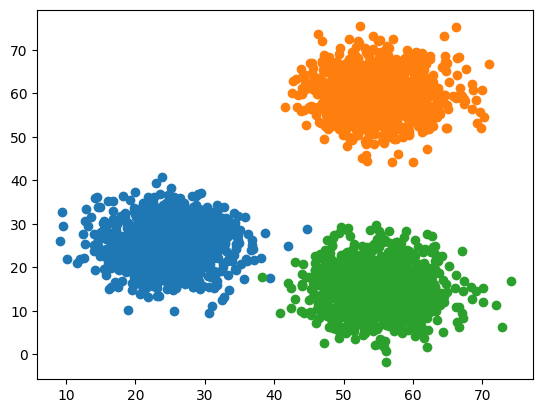

In [4]:
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()

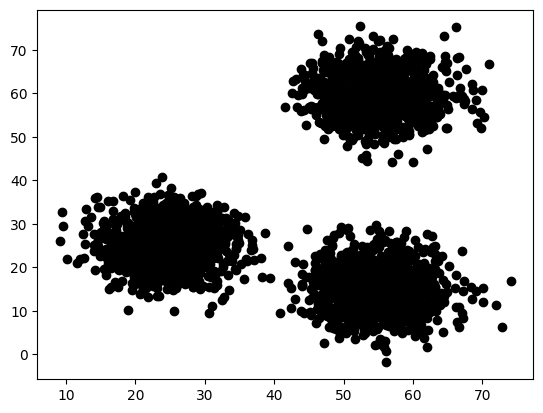

In [5]:
# k_means algoritması bunu görecek.
plt.scatter(x1,y1,color = "black")
plt.scatter(x2,y2,color = "black")
plt.scatter(x3,y3,color = "black")
plt.show()

## K_MEANS

In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss = []

for k in range (1,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data)

    # inertia_ --> Herbir k için wcss değerini bul.
    wcss.append(kmeans.inertia_)

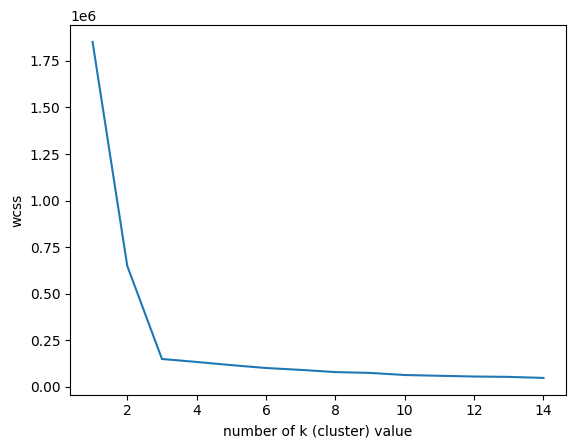

In [8]:
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

3 (k değeri) elbow (dirsek) noktası.

## k=3 için model

In [13]:
data

,x,y,label
0,18.979587,20.381491,2
1,23.258284,22.401954,2
2,21.521178,23.895705,2
3,38.147253,22.052988,2
4,24.563392,27.814946,2
...,...,...,...
2995,58.059100,24.760579,0
2996,51.521700,14.214137,0
2997,63.207107,11.472067,0
2998,47.448806,20.838392,0


In [14]:
kmeans2 = KMeans(n_clusters = 3)
clusters = kmeans2.fit_predict(data)

In [15]:
clusters

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

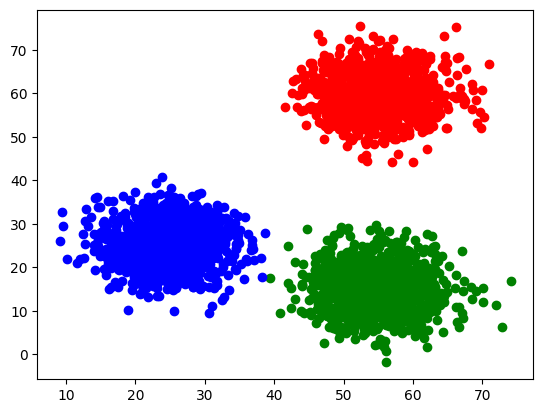

In [20]:
data["label"] = clusters

plt.scatter(data.x[data.label == 0],data.y[data.label == 0],color = "red")
plt.scatter(data.x[data.label == 1],data.y[data.label == 1],color = "green")
plt.scatter(data.x[data.label == 2],data.y[data.label == 2],color = "blue")

plt.show()

## centroid

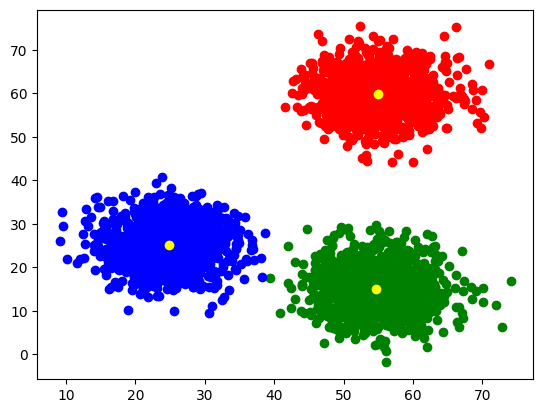

In [23]:
data["label"] = clusters

plt.scatter(data.x[data.label == 0],data.y[data.label == 0],color = "red")
plt.scatter(data.x[data.label == 1],data.y[data.label == 1],color = "green")
plt.scatter(data.x[data.label == 2],data.y[data.label == 2],color = "blue")

# cluster_centers_ --> centroid
# 2 boyutlu 0 --> x ekseni  1 --> y ekseni
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color = "yellow")

plt.show()